In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

In [3]:
df = pd.read_csv("data/bs.csv")
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [4]:
df2= pd.read_csv("data/bsNET.csv")
df2.head()

,Source,Target,Weight,typeTrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0
1,'C352968107','M348934600',39.68,'es_transportation',0
2,'C2054744914','M1823072687',26.89,'es_transportation',0
3,'C1760612790','M348934600',17.25,'es_transportation',0
4,'C757503768','M348934600',35.72,'es_transportation',0


In [5]:
df2 = df2.rename(columns={"Source": "customer", "Target": "merchant", "Weight": "amount", "typeTrans": "category"})
df2.isin(df).all().all()

True

In [6]:
cols = list(df.columns)
fields = list(set(cols) - set(["step", "customer", "merchant", "zipcodeOri", "zipMerchant"]))
for field in fields:
    print(df.groupby("fraud")[field].value_counts())

fraud  fraud
0      0        587443
1      1          7200
Name: fraud, dtype: int64
fraud  gender
0      'F'       319807
       'M'       265950
       'E'         1171
       'U'          515
1      'F'         4758
       'M'         2435
       'E'            7
Name: gender, dtype: int64
fraud  category               
0      'es_transportation'        505119
       'es_food'                   26254
       'es_health'                 14437
       'es_wellnessandbeauty'      14368
       'es_fashion'                 6338
       'es_barsandrestaurants'      6253
       'es_hyper'                   5818
       'es_tech'                    2212
       'es_sportsandtoys'           2020
       'es_home'                    1684
       'es_hotelservices'           1196
       'es_contents'                 885
       'es_otherservices'            684
       'es_travel'                   150
       'es_leisure'                   25
1      'es_sportsandtoys'           1982
       'es_health' 

In [7]:
df.step.min()
df.step.max()

0

179

<AxesSubplot:xlabel='fraud,gender'>

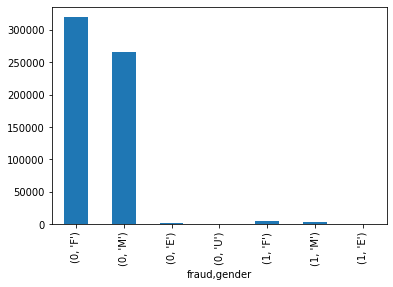

In [30]:
df.groupby("fraud").gender.value_counts().plot(kind = 'bar')

<AxesSubplot:>

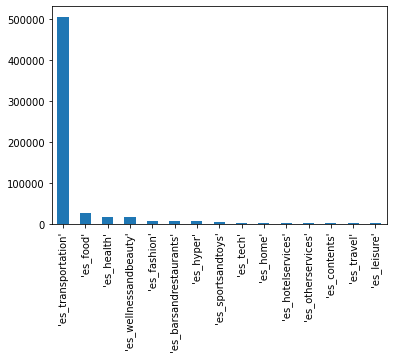

In [19]:
df.category.value_counts().plot(kind = 'bar')

<AxesSubplot:>

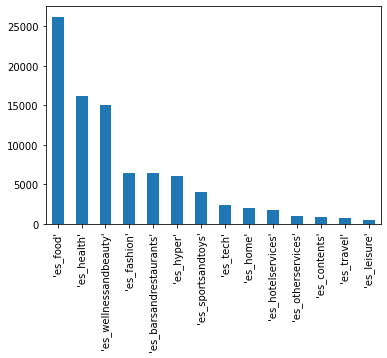

In [28]:
df[~df.category.isin(["'es_transportation'"])].category.value_counts().plot(kind = 'bar')

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

array([[<AxesSubplot:title={'center':'amount'}>]], dtype=object)

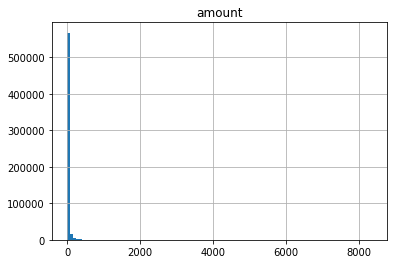

In [8]:
import matplotlib
df.amount.describe()
df.hist(column = 'amount', bins=100)

array([[<AxesSubplot:title={'center':'amount'}>]], dtype=object)

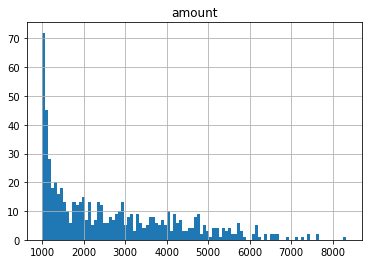

In [14]:
df[df.amount > 1000].hist(column = 'amount', bins=100)

In [9]:
pd.cut(df.amount, 100)

0         (-8.33, 83.3]
1         (-8.33, 83.3]
2         (-8.33, 83.3]
3         (-8.33, 83.3]
4         (-8.33, 83.3]
              ...      
594638    (-8.33, 83.3]
594639    (-8.33, 83.3]
594640    (-8.33, 83.3]
594641    (-8.33, 83.3]
594642    (-8.33, 83.3]
Name: amount, Length: 594643, dtype: category
Categories (100, interval[float64, right]): [(-8.33, 83.3] < (83.3, 166.599] < (166.599, 249.899] < (249.899, 333.198] ... (7996.762, 8080.061] < (8080.061, 8163.361] < (8163.361, 8246.66] < (8246.66, 8329.96]]

<AxesSubplot:>

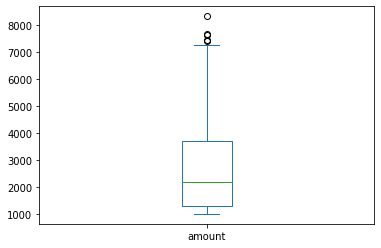

In [29]:
df[df.amount > 1000].amount.plot.box()